In [22]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


This algorithm has been implemented according to the student version of Vissim, which was capable of simulating no more than 500 seconds


In [23]:
#scenario 5 is based scenario generated by me: all are 3.5
vehicle_routes = pd.read_csv("data/Scenarios generated by Marco/GothaerPlatz - Scenario 1.csv")
#change the vehicle type from number to name
vehicle_routes['VEHTYPE'].replace(to_replace=[100, 150, 200, 300], value=["Car", "Transporter", "HGV", "Bus"],
                                            inplace=True)
vehicle_routes_filtered = vehicle_routes[vehicle_routes["$VEHICLE:NO"]<318]
max_accs_cars= vehicle_routes_filtered.groupby(["$VEHICLE:NO"]).max()
print(max_accs_cars)



              SIMTMOFDAY  SIMSEC     POS  POSLAT      VEHTYPE  SPEED  \
$VEHICLE:NO                                                            
1            00:00:53.70    53.7  246.30    0.97          Car  53.69   
2            00:00:48.30    48.3  247.22    1.00          Car  52.16   
3            00:01:12.80    72.8  135.87    0.97  Transporter  41.54   
4            00:01:01.70    61.7  219.92    0.50          Car  54.24   
5            00:01:09.90    69.9  220.34    1.00          Car  53.05   
...                  ...     ...     ...     ...          ...    ...   
313          00:09:36.00   576.0  220.20    1.00  Transporter  42.04   
314          00:09:37.40   577.4  219.90    1.00  Transporter  44.24   
315          00:08:58.30   538.3  246.58    1.00          Car  58.12   
316          00:09:36.60   576.6  246.93    0.50          HGV  35.15   
317          00:09:01.50   541.5  246.47    1.00          Car  55.32   

             ACCELERATION  DISTTRAVTOT  LENGTH  LANE\LINK\NO  L

The value of CC8 is approximately 3.25


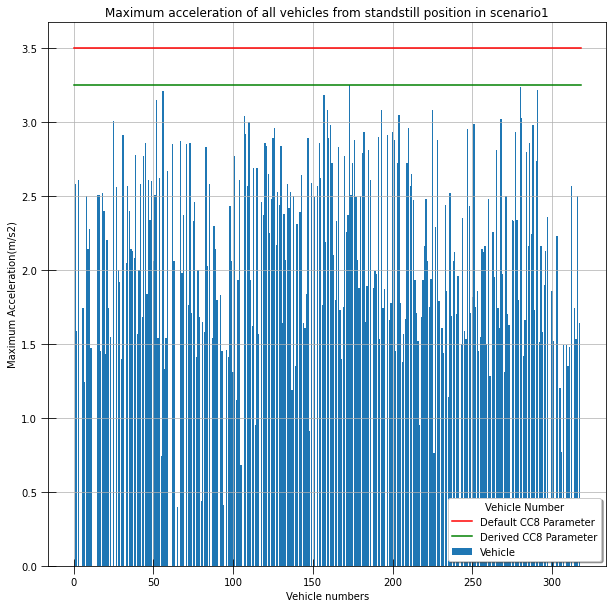

In [24]:
# barchart with dictionary
vehicle_numbers = [i for i in range(1, 318)]


# plt.savefig("data/CC8/Based_Scenario_by_me.png")
max_accs_cars["ACCELERATION"].describe()
cc8 = max_accs_cars["ACCELERATION"].max()
print(f"The value of CC8 is approximately {cc8}")

# draw CC8 10
x1_coordinates = [0, 318]
y1_coordinates = [cc8, cc8]
fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(vehicle_numbers, max_accs_cars["ACCELERATION"], label="Vehicle")
ax.set_title(
    label="Maximum acceleration of all vehicles from standstill position in scenario1",
    color="black")
# draw CC8
x_coordinates = [0, 318]

#Default value for CC8
y_coordinates = [3.5, 3.5]

ax.plot(x_coordinates, y_coordinates, color="red", label="Default CC8 Parameter")
ax.set_xlabel("Vehicle numbers", color="black")
ax.set_ylabel("Maximum Acceleration(m/s2)", color="black")
ax.tick_params(axis="both", length=15, direction="inout", color="black", labelcolor="black")
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
# draw legends
ax.grid("on", alpha=0.9)
ax.plot(x1_coordinates, y1_coordinates, color="green", label="Derived CC8 Parameter")
ax.legend(loc="lower right", shadow="true", fancybox=True, title="Vehicle Number");
plt.savefig("D:\Digital Engineering\Courses\Wi21-22\Traffic data simulation\Final Submission (Revised)\pics\CC8 scenario1.png")



calculating normal distribution



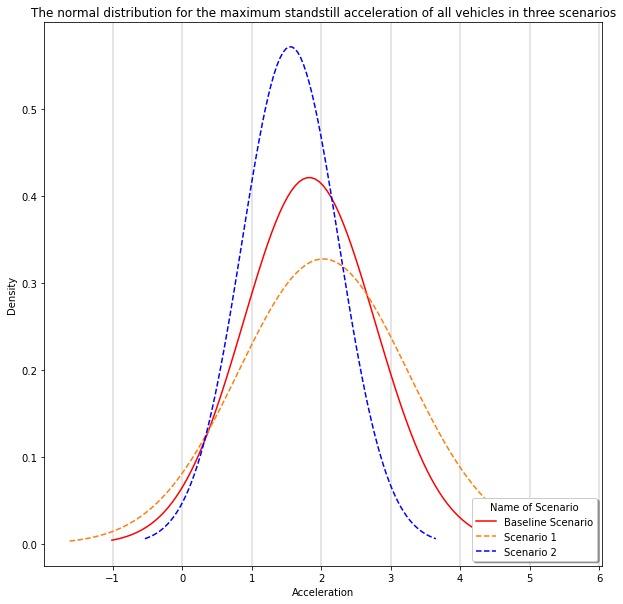

In [25]:
#https://stackoverflow.com/questions/10138085/how-to-plot-normal-distribution
import scipy.stats as stats
import math

fig, ax = plt.subplots(figsize=(10, 10))
mu_baseline = 1.829
sigma_baseline = 0.947
x_baseline = np.linspace(mu_baseline - 3*sigma_baseline, mu_baseline + 3*sigma_baseline, 100)
line_baseline, =ax.plot(x_baseline, stats.norm.pdf(x_baseline, mu_baseline, sigma_baseline), label="Baseline Scenario")
line_baseline.set_color("red")
ax.legend(loc="lower right", shadow="true", fancybox=True, title="Name of Scenario");

mu_scenario1 = 2.030
sigma_scenario1 = 1.217
x_scenario1 = np.linspace(mu_scenario1 - 3*sigma_scenario1, mu_scenario1 + 3*sigma_scenario1, 100)
line_scenario1, =ax.plot(x_scenario1, stats.norm.pdf(x_scenario1, mu_scenario1, sigma_scenario1), label="Scenario 1")
line_scenario1.set_linestyle("--")
ax.xaxis.grid(True, color="black", linewidth=0.2)
ax.legend(loc="lower right", shadow="true", fancybox=True, title="Name of Scenario");



mu_scenario2 = 1.558
sigma_scenario2 = 0.698
x_scenario2 = np.linspace(mu_scenario2 - 3*sigma_scenario2, mu_scenario2 + 3*sigma_scenario2, 100)
line_scenario2, =ax.plot(x_scenario2, stats.norm.pdf(x_scenario2, mu_scenario2, sigma_scenario2), label="Scenario 2")
line_scenario2.set_linestyle("--")
line_scenario2.set_color("blue")
ax.xaxis.grid(True, color="black", linewidth=0.2)
ax.legend(loc="lower right", shadow="true", fancybox=True, title="Name of Scenario");



plt.xticks(fontsize=10, color="black")
plt.yticks(fontsize=10, color="black")
ax.set_xlabel("Acceleration", fontsize=10, color="black")
ax.set_ylabel("Density", fontsize=10, color="black")
ax.set_title(label="The normal distribution for the maximum standstill acceleration of all vehicles in three scenarios",color="black")
plt.savefig("D:\Digital Engineering\Courses\Wi21-22\Traffic data simulation\Final Submission (Revised)\pics\distribution.png")



